# Student Information

Name: Virintorn Kantaravichaiwat (陳琳珊）

Student ID: 110065427

GitHub ID: sandvirin

Kaggle name: sandvirin

Kaggle private scoreboard snapshot:

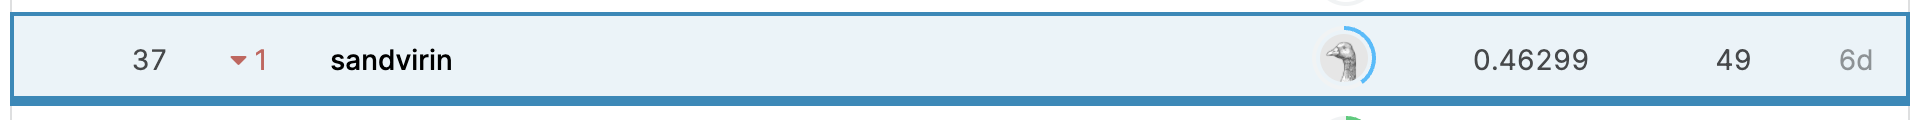

---
## Instructions
1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Deep Learning
6. Word to Vector
7. Clustering
8. High-dimension Visualization

---
## 1. Data Preparation

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [6]:
# Sort as long tail
# feature creation
# find word frequency
import nltk
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

In [7]:
train_df['unigrams'] = train_df['text'].apply(lambda x: dmh.tokenize_text(x))
test_df['unigrams'] = test_df['text'].apply(lambda x: dmh.tokenize_text(x))

In [8]:
#feature subset selection
from sklearn.feature_extraction.text import CountVectorizer

count_vect_train = CountVectorizer(stop_words = "english")
count_vect_test = CountVectorizer(stop_words = "english")
train_df_counts = count_vect_train.fit_transform(train_df.text)
test_df_counts = count_vect_test.fit_transform(test_df.text)

In [9]:
analyze = count_vect_train.build_analyzer()
analyze("Hello World!")
#" ".join(list(X[4:5].text))

['hello', 'world']

In [10]:
# convert from sparse array to normal array
train_df_counts[0:30, 0:100].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
test_df_counts[0:30, 0:100].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [12]:
#dimension reduction
from sklearn.decomposition import PCA

train_df_reduced = PCA(n_components = 2).fit_transform(train_df_counts.toarray())
test_df_reduced = PCA(n_components = 2).fit_transform(test_df_counts.toarray())

In [14]:
#attribute transformation
term_frequencies_train = []
for j in range(0,train_df_counts.shape[1]):
    term_frequencies_train.append(sum(train_df_counts[:,j].toarray()))

In [15]:
term_frequencies_test = []
for j in range(0,test_df_counts.shape[1]):
    term_frequencies_test.append(sum(test_df_counts[:,j].toarray()))
    
term_frequencies_train = np.asarray(train_df_counts.sum(axis=0))[0]
term_frequencies_test = np.asarray(test_df_counts.sum(axis=0))[0]

In [20]:
#convert to data frame
feature_train = pd.DataFrame(count_vect_train.get_feature_names()[:]) 
feature_test = pd.DataFrame(count_vect_test.get_feature_names()[:]) 
count_train = pd.DataFrame(term_frequencies_train[:])
count_test =  pd.DataFrame(term_frequencies_test[:])

In [21]:
#concat table
concat_test=pd.concat([feature_test, count_test], axis=1)
concat_train=pd.concat([feature_train, count_train], axis=1)
concat_test.columns =['name', 'Count']
concat_train.columns =['name', 'Count']

In [22]:
concat_test

,name,Count
0,10,1
1,11,1
2,11am,2
3,12,3
4,12s,1
...,...,...
1768,yungdoujin,1
1769,zen,1
1770,zeroalcohol,1
1771,zubairsabirpti,1


In [23]:
#sorting
concat_test = concat_test.sort_values(["Count"], ascending=False)
concat_train = concat_train.sort_values(["Count"], ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'just'),
  Text(1, 0, 'like'),
  Text(2, 0, 'don'),
  Text(3, 0, 'amp'),
  Text(4, 0, 'people'),
  Text(5, 0, 'time'),
  Text(6, 0, 'day'),
  Text(7, 0, 'know'),
  Text(8, 0, 'love'),
  Text(9, 0, 'good'),
  Text(10, 0, 'watch'),
  Text(11, 0, 'think'),
  Text(12, 0, 'make'),
  Text(13, 0, 've'),
  Text(14, 0, 'today'),
  Text(15, 0, 'happy'),
  Text(16, 0, 'want'),
  Text(17, 0, 'got'),
  Text(18, 0, 'lost'),
  Text(19, 0, 'life'),
  Text(20, 0, 'live'),
  Text(21, 0, 'really'),
  Text(22, 0, 'need'),
  Text(23, 0, 'll'),
  Text(24, 0, 'feel'),
  Text(25, 0, 'let'),
  Text(26, 0, 'way'),
  Text(27, 0, 'amazing'),
  Text(28, 0, 'going'),
  Text(29, 0, 'start')])

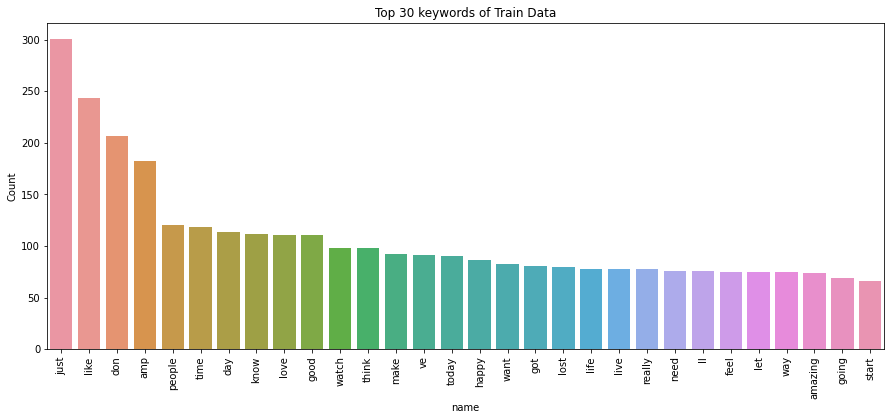

In [24]:
#plot top 30 keywords of train data
plt.figure(figsize=(15, 6))

ax = sns.barplot(y='Count',x='name',data=concat_train.head(30))
ax.set_title('Top 30 keywords of Train Data');
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'just'),
  Text(1, 0, 'like'),
  Text(2, 0, 'don'),
  Text(3, 0, 'people'),
  Text(4, 0, 'day'),
  Text(5, 0, 'love'),
  Text(6, 0, 'want'),
  Text(7, 0, 'make'),
  Text(8, 0, 'think'),
  Text(9, 0, 'amp'),
  Text(10, 0, 'man'),
  Text(11, 0, 'awful'),
  Text(12, 0, 'know'),
  Text(13, 0, 'anger'),
  Text(14, 0, 'really'),
  Text(15, 0, 'new'),
  Text(16, 0, 'life'),
  Text(17, 0, 'time'),
  Text(18, 0, 'll'),
  Text(19, 0, 'things'),
  Text(20, 0, 'happy'),
  Text(21, 0, 'feel'),
  Text(22, 0, 'didn'),
  Text(23, 0, 'optimism'),
  Text(24, 0, 'today'),
  Text(25, 0, 'look'),
  Text(26, 0, 'little'),
  Text(27, 0, 'sad'),
  Text(28, 0, 'good'),
  Text(29, 0, 'issues')])

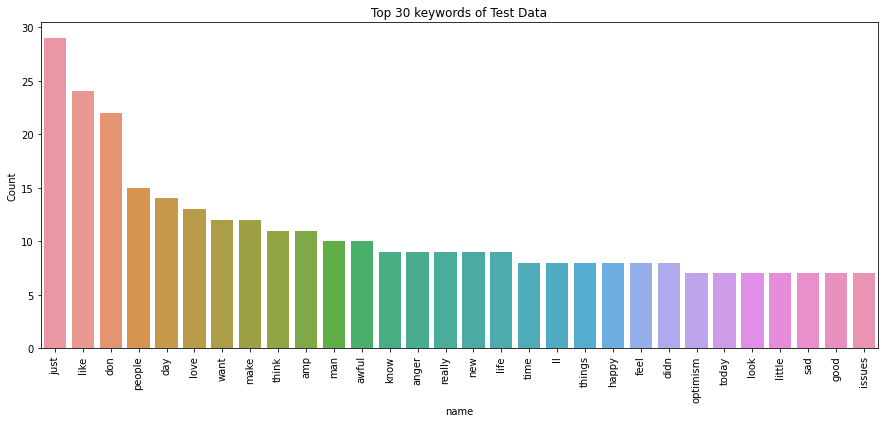

In [25]:
#plot top 30 keywords of test data
plt.figure(figsize=(15, 6))

ax = sns.barplot(y='Count',x='name',data=concat_test.head(30))
ax.set_title('Top 30 keywords of Test Data');
plt.xticks(rotation=90)

### 1.2 Save data

In [26]:
## save to pickle file, more convenience, create pickle file = to_pickle
train_df.to_pickle("train_df.pkl")
test_df.to_pickle("test_df.pkl")

In [27]:
import pandas as pd

## load a pickle file, need to before opening = read_pickle
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [28]:
#group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

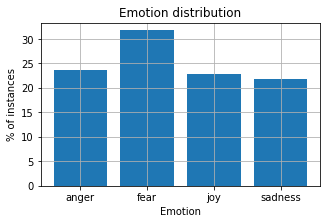

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [30]:
#how many word each word which present in each document
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [32]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [33]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [34]:
type(train_data_BOW_features)

scipy.sparse.csr.csr_matrix

In [35]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [37]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names()
feature_names[100:110]

['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s', '31']

In [38]:
#token: feature_names, emoji in raw data, analyzer doesn't preserve emoji to token
"😂" in feature_names

False

Let's try using another tokenizer below.

In [39]:
import nltk

# build analyzers (bag-of-words), set limit top 500 features
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

/Users/sand/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(3613, 500)

In [40]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       ...,
       [2, 1, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [41]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names()
feature_names_500[100:110]

['change',
 'cheer',
 'cheerful',
 'cheering',
 'cheery',
 'class',
 'come',
 'comes',
 'could',
 'country']

In [42]:
#check emoji new feature (nltk), emoji is useful in targe task
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [43]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix= vectorizer.fit_transform(train_df['text'])
print(tfidf_matrix.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [44]:
# observe some feature names
feature_names = vectorizer.get_feature_names()
feature_names[100:110]

['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s', '31']

In [45]:
#another tokenizer
import nltk

# build analyzers, set limit top 100 features
IF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize, stop_words = "english")

# apply analyzer to training data
IF_1000.fit(train_df['text'])

train_data_IF_features_1000 = IF_1000.transform(train_df['text'])

## check dimension
train_data_IF_features_1000.shape

(3613, 1000)

In [46]:
# show the feature names for features [100:110]
feature_names_1000 = IF_1000.get_feature_names()
feature_names_1000[100:110]

['balls',
 'based',
 'bb18',
 'bc',
 'bday',
 'beat',
 'beautiful',
 'bed',
 'behavior',
 'believe']

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

#3613, 347 amount of data

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [48]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'fear', 'anger', 'joy', 'fear', 'sadness', 'fear',
       'sadness', 'joy', 'fear'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [49]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)
 
print('training accuracy: {}'.format(round(acc_train, 4)))
print('testing accuracy: {}'.format(round(acc_test, 4)))

#finding overfit, underfit

training accuracy: 0.9859
testing accuracy: 0.6571


In [50]:
## precision, recall, f1-score, test data
# e.g.well balance, total 0.66, some class too high 0.99 -> over specific 
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.64      0.69      0.67        84
        fear       0.65      0.67      0.66       110
         joy       0.68      0.66      0.67        79
     sadness       0.66      0.59      0.62        74

    accuracy                           0.66       347
   macro avg       0.66      0.65      0.66       347
weighted avg       0.66      0.66      0.66       347



In [51]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[58 16  6  4]
 [14 74 10 12]
 [ 9 11 52  7]
 [ 9 13  8 44]]


In [52]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

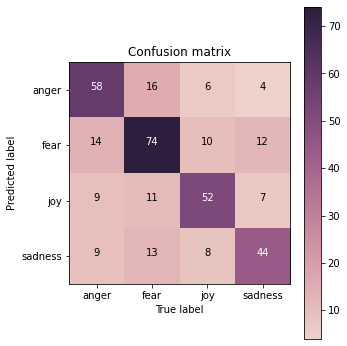

In [53]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [54]:
# The confusion matrix represents how model predicts correctly and incorrectly
# It shows the ways in which your classification model is confused when it makes predictions.

# Anger emotions predicted correctly is 58
# Fear emotions predicted correctly is 74 -> Highest correctness prediction
# Joy emotions predicted correctly is 52
# Sadness emotions predicted correctly is 44

#For the confusion, The true: fear and predicted: anger is kind of confusing.
#It means there are 16 which is a true label as fear, but it is predicted to anger.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [55]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

In [56]:
#Train model
naive_classifier = MultinomialNB()
naive_classifier = naive_classifier.fit(X_train, y_train)

In [57]:
#Accuracy
ac_naive_train = naive_classifier.score(X_train, y_train)
ac_naive_test = naive_classifier.score(X_test, y_test)

In [58]:
## accuracy score
predictions = naive_classifier.predict(X_test)
ac_naive_test = accuracy_score(y_test,predictions)

print('training accuracy: {}'.format(round(ac_naive_train,4)))
print('testing accuracy: {}'.format(round(ac_naive_test,4)))

#finding overfit, underfit

training accuracy: 0.7872
testing accuracy: 0.6974


In [59]:
# check by confusion matrix
cm_naive = confusion_matrix(y_test, predictions) 
print(cm_naive)

[[56 14  5  9]
 [ 9 85  5 11]
 [10  8 55  6]
 [12 10  6 46]]


In [60]:
## precision, recall, f1-score, test data
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       anger       0.64      0.67      0.65        84
        fear       0.73      0.77      0.75       110
         joy       0.77      0.70      0.73        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



In [86]:
#plot confusion matrix Naive Bayes
def plot_confusion_matrix_naive(cm_naive, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm_naive, interpolation='nearest', cmap='Blues')
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm_naive.shape[1]),
           yticks=np.arange(cm_naive.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm_naive.max() / 2.
    for i, j in itertools.product(range(cm_naive.shape[0]), range(cm_naive.shape[1])):
        plt.text(j, i, format(cm_naive[i, j], fmt), horizontalalignment="center", color="white" if cm_naive[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

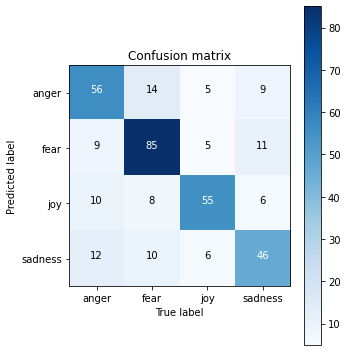

In [87]:
# plot confusion matrix: Naive Bayes
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix_naive(cm_naive, classes=my_tags, title='Confusion matrix')

# The confusion matrix represent how model predicts correctly and incorrectly
# It shows the ways in which your classification model is confused when it makes predictions.
# Anger emotions predicted correctly is 56
# Fear emotions predicted correctly is 86 -> Highest correctness prediction
# Joy emotions predicted correctly is 55
# Sadness emotions predicted correctly is 46
# The high confusion is that the True label of Fear was predicted to Anger which is 14

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [63]:
# The accuracy of Naive Bayes model which is 69.74% more than accuracy of Decision Tree model which is 65.71%
# Both model work with classification problems.

# Decision trees 
# tend to over fit the training data (accuray = 98.59%)
# divide the data into subnodes, Splitting a lot leads to complex trees and raises probability you are overfitting
# more flexible and easy to implement.
# pruning may neglect some key values in training data, which can lead the accuracy for a toss.
# work better with lots of data compared to Naive Bayes.
# have a hard time with correlated attributes

# Naive Bayes
# It is a classification using probability principles to help calculate.
# requires you build a classification by hand. 
# Have to pick the best features it will use to classify. Picking which features matter is up to you.
# work quite well when the training data doesn't contain all possibilities so it can be very good with low amounts of data.


---
## 5. Deep Learning

### 5.1 Prepare data (X, y)

In [64]:
from tensorflow import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 5.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [65]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 3366    sadness
2102        joy
2146        joy
1185       fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 5.3 Build model

In [66]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [67]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                32064     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax (Softmax)            (None, 4)                 0     

### 6.4 Train

In [68]:
from tensorflow.keras.callbacks import CSVLogger

#training log
csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training! finding content & label of training data set
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))

#print how much model learning (time)~performance
print('training finish')

Train on 3613 samples, validate on 347 samples
Epoch 1/25
3613/3613 [==============================] - 1s 241us/sample - loss: 1.3242 - accuracy: 0.3770 - val_loss: 1.2675 - val_accuracy: 0.4352
Epoch 2/25
3613/3613 [==============================] - 0s 130us/sample - loss: 0.9904 - accuracy: 0.6324 - val_loss: 0.9187 - val_accuracy: 0.6599
Epoch 3/25
3613/3613 [==============================] - 0s 130us/sample - loss: 0.5945 - accuracy: 0.7935 - val_loss: 0.7967 - val_accuracy: 0.6974
Epoch 4/25
3613/3613 [==============================] - 0s 130us/sample - loss: 0.4298 - accuracy: 0.8409 - val_loss: 0.7865 - val_accuracy: 0.6888
Epoch 5/25
3613/3613 [==============================] - 0s 126us/sample - loss: 0.3428 - accuracy: 0.8716 - val_loss: 0.8166 - val_accuracy: 0.7147
Epoch 6/25
3613/3613 [==============================] - 0s 131us/sample - loss: 0.2886 - accuracy: 0.8995 - val_loss: 0.8411 - val_accuracy: 0.6859
Epoch 7/25
3613/3613 [==============================] - 0s 128us/

### 5.5 Predict on testing data

In [69]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[4.3457899e-08, 8.0652601e-01, 1.9345652e-01, 1.7463806e-05],
       [2.7604849e-06, 9.9960893e-01, 3.8211158e-04, 6.1461010e-06],
       [9.9970323e-01, 2.7774749e-06, 6.0488844e-07, 2.9333070e-04],
       [2.9506998e-08, 5.8496562e-06, 9.9996889e-01, 2.5205585e-05],
       [1.3113403e-02, 9.4578303e-02, 5.8165477e-03, 8.8649166e-01]],
      dtype=float32)

In [70]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'fear', 'anger', 'joy', 'sadness'], dtype=object)

In [71]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.64


In [72]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.376972,1.324168,0.435159,1.267478
1,1,0.632438,0.990430,0.659942,0.918659
2,2,0.793523,0.594471,0.697406,0.796735
3,3,0.840853,0.429778,0.688761,0.786524
4,4,0.871575,0.342819,0.714697,0.816605
5,5,0.899529,0.288606,0.685879,0.841096
6,6,0.922779,0.234771,0.677233,0.930491
7,7,0.936618,0.199194,0.700288,0.944147
8,8,0.948519,0.172397,0.688761,1.010529
9,9,0.954332,0.147742,0.680115,1.134256


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

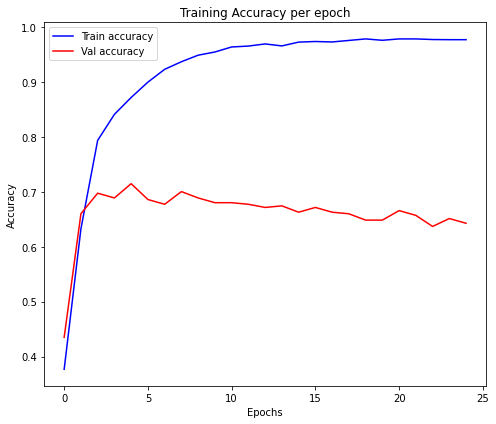

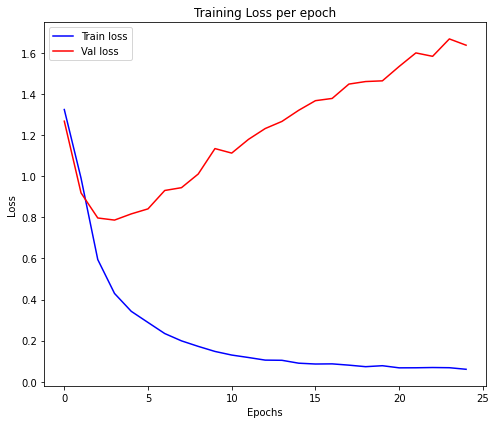

In [73]:
# how do you feel it related overfitting/underfitting
import matplotlib.pyplot as plt
import numpy as np

# Creates fig and ax from subplots().
#figure, axis = plt.subplots(nrows = 1, ncols = 2, figsize=(8,6))

#plot train acc
plt.rcParams["figure.figsize"] = [7, 6]
plt.rcParams["figure.autolayout"] = True
plt.plot(training_log['accuracy'], color='blue')
plt.plot(training_log['val_accuracy'], color='red')
plt.legend(["Train accuracy", "Val accuracy"])
plt.title('Training Accuracy per epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

#plot train loss
ax2=plt.plot(training_log['epoch'], training_log['loss'], color='blue')
ax2=plt.plot(training_log['epoch'], training_log['val_loss'], color='red')
plt.legend(["Train loss", "Val loss"])
ax2=plt.title('Training Loss per epoch')
ax2=plt.xlabel('Epochs')
ax2=plt.ylabel('Loss')
ax2=plt.show()

#Training and Validation Accuracy & Loss
#It shows underfitting problem: when model is too simple, both training and test errors are large
#Underfitting happens when algorithm used to build prediction model is very simple and 
#not able to learn complex pattern from the training data.


---
## 6. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 6.1 Prepare training corpus

In [74]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

# represent word in each text in each document

,id,text,text_tokenized
3366,40539,Gonna be a loooooong year as a Browns fan. Lon...,"[Gon, na, be, a, loooooong, year, as, a, Brown..."
2102,30098,@airvistara as always it was indeed a wonderfu...,"[@, airvistara, as, always, it, was, indeed, a..."
2146,30142,@itsyourgirl_Z happy birthday :) have a blesse...,"[@, itsyourgirl_Z, happy, birthday, :, ), have..."
1185,20328,From harboring Osama bin Laden to its relation...,"[From, harboring, Osama, bin, Laden, to, its, ..."
1997,21140,"Don't #worry if you're not the best , if you a...","[Do, n't, #, worry, if, you, 're, not, the, be..."


In [75]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Gon', 'na', 'be', 'a', 'loooooong', 'year', 'as', 'a', 'Browns', 'fan', '.', 'Longer', 'than', 'normal', 'and', 'that', "'s"]),
       list(['@', 'airvistara', 'as', 'always', 'it', 'was', 'indeed', 'a', 'wonderful', 'experience', 'flying', 'with', 'you', 'guys', 'today', '#', 'bestinbusiness', '#', 'happyme']),
       list(['@', 'itsyourgirl_Z', 'happy', 'birthday', ':', ')', 'have', 'a', 'blessed', 'day', 'love', 'from', 'Toronto', ':', ')', '#', 'bday', '#', 'smile'])],
      dtype=object)

### 6.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [76]:
## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
3366,40539,Gonna be a loooooong year as a Browns fan. Lon...,"[Gon, na, be, a, loooooong, year, as, a, Brown..."
2102,30098,@airvistara as always it was indeed a wonderfu...,"[@, airvistara, as, always, it, was, indeed, a..."
2146,30142,@itsyourgirl_Z happy birthday :) have a blesse...,"[@, itsyourgirl_Z, happy, birthday, :, ), have..."
1185,20328,From harboring Osama bin Laden to its relation...,"[From, harboring, Osama, bin, Laden, to, its, ..."
1997,21140,"Don't #worry if you're not the best , if you a...","[Do, n't, #, worry, if, you, 're, not, the, be..."


In [77]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_iter)
#change code vector_size/epoch

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 6.3 Generating word vector (embeddings)

In [78]:
# get the corresponding vector of a word, it check the word use it to understand relations, more related to each others
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.4696532 ,  0.3197422 , -0.23487423,  0.03292568,  0.10282311,
       -1.2740762 ,  0.51557356,  2.0140657 , -0.45074537, -0.2646646 ,
       -0.44346705, -0.37647888, -0.11395065,  0.3615318 , -0.3197177 ,
       -0.11898134,  0.21252398, -0.40556672,  0.5647828 , -1.2360008 ,
        0.3836082 ,  0.8778488 ,  0.70097196, -0.14264134, -0.08481446,
       -0.2749023 , -0.25133172,  0.6475998 , -0.39888757,  0.19216383,
        0.37893173,  0.14699402,  0.6796544 , -0.85372007, -0.24013387,
        0.42864245, -0.14847039, -0.27451748, -0.28845534, -0.34202603,
        0.37220293, -0.00862662, -0.36011183,  0.34335315,  0.6837281 ,
       -0.23295893, -0.6265806 ,  0.03321234,  0.39239684,  0.22918311,
        0.04990625, -0.36882818,  0.02065936,  0.24835835, -0.45460016,
       -0.559121  ,  0.03678906, -0.28135324, -0.2445649 ,  0.14917739,
        0.27415282,  0.10629032,  0.13780667, -0.00439994, -0.46198526,
        0.7893242 ,  0.8053158 ,  0.69454795, -1.1548914 ,  0.56

In [79]:
# Get the most similar words surrounding word of 'happy'
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('blessed', 0.9355456233024597),
 ('birthday', 0.9345726370811462),
 ('bday', 0.9202485680580139),
 ("'you", 0.9171020984649658),
 ('Be', 0.9164025783538818),
 ('blessing', 0.9158739447593689),
 ('O', 0.9097050428390503),
 ('Kik', 0.9080191850662231),
 ('surprised', 0.9061950445175171),
 ('cry', 0.9052927494049072)]

### 6.4 Using a pre-trained w2v model

In [80]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)
#word close to 'happy'

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912951469421),
 ('overjoyed', 0.6599285006523132),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.6360421180725098),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269948482513428),
 ('excited', 0.6247665882110596)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [88]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)
#it doesn't mean it's synonyms, but it reflect 'happy birthday', use together 

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.917618453502655),
 ('miss', 0.9164499640464783),
 ('hello', 0.9158352017402649),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053248167037964),
 ('bless', 0.9027323722839355),
 ('wish', 0.9013165235519409)]

### 6.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [89]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])
#related king+woman, subtract 'man'

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377322435379028),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134939193726),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
# Word2Vec is a learned representation for text where it capture the context of the word in a document, semantic and syntactic similarity.
# There are 2 different learning models that can be used as part of the word2vec approach to learn the word embedding.
# 1.Continuous Bag-of-Words, or CBOW model.
# The CBOW model learns the embedding by predicting the current word based on its context. 
# 2.Continuous Skip-Gram Model.
# The continuous skip-gram model learns by predicting the surrounding words given a current word.

### 7. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


In [90]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [91]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

# cluster should be difference 1:0, separate cluster

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![Imgur](pics/pic6.png)

In [92]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

In [93]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)


## 8. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, tf-idf, or word2vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient...

Our aim will be to create a visualization similar to the one below:

### 8.1 Prepare visualizing target

Let's repare data lists like:
    - happpy words
    - angry words
    - data words
    - mining words

In [94]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 8.1 Plot using t-SNE (2-dimension)

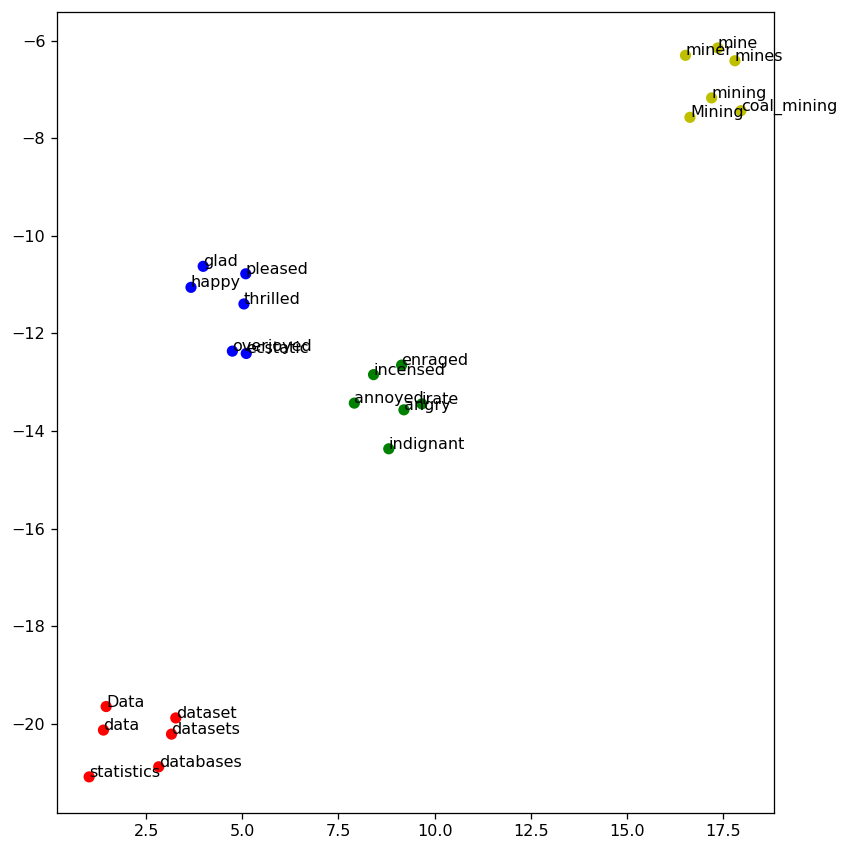

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.key_to_index.keys()) #.vocab -> .key_to_index
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

#present some related word and cluster

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [100]:
# prepare visualize target
word_list = ['angry', 'happy', 'sad', 'sad']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['y'] * cn + ['g'] * cn + ['r'] * cn + ['b'] * cn
print(color)

angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'e

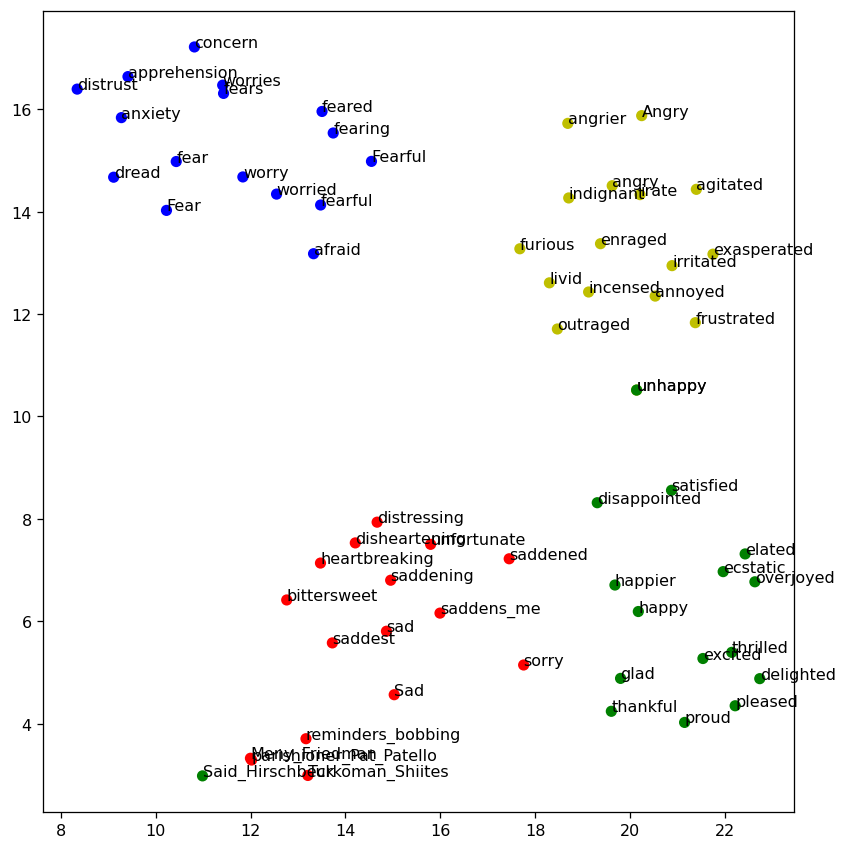

In [101]:
#plot visualization
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.key_to_index.keys()) #.vocab -> .key_to_index
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

#present some related word and cluster

---

For report for the Kaggle competition, please see on this notebook: https://github.com/sandvirin/DM2021-Lab2-HW2/blob/main/DM2021_Lab2_Kaggle.ipynb